In [ ]:
import pandas as pd
import seaborn as sb

datos = pd.read_csv('U4_01_housing.csv')

In [ ]:
datos_na = datos.dropna()

In [ ]:
dummies = pd.get_dummies(datos_na['ocean_proximity'], dtype=int, drop_first=True)

In [ ]:
datos_na = datos_na.join(dummies)

In [ ]:
datos_na = datos_na.drop(['ocean_proximity'], axis=1)

<Axes: >

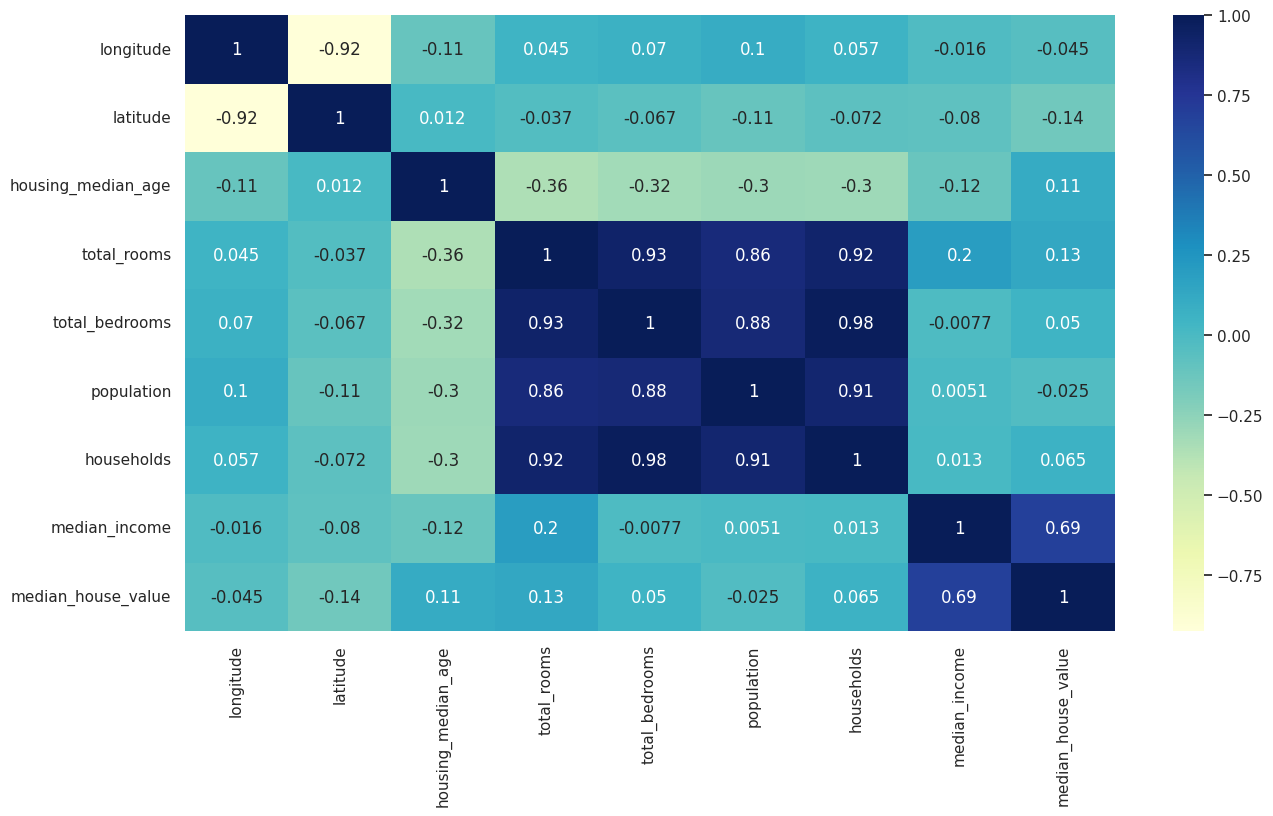

In [ ]:
sb.set(rc={'figure.figsize':(15,8)})
sb.heatmap(data=datos_na.corr(), annot=True, cmap='YlGnBu' )

In [ ]:
datos_na['median_house_value_median_income_rario'] = datos_na['median_house_value'] / datos_na['median_income']

In [ ]:
X = datos_na.drop(['median_house_value'], axis=1)
y = datos_na['median_house_value']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=.20)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False, with_std=False)

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
#entrenar el modelo
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()

modelo.fit(X_train, y_train) # ocurre el entrenamiento

LinearRegression()

In [ ]:
# reralizar las predicciones
predicciones = modelo.predict(X_test)


In [ ]:
comparativa = { 'predicciones': predicciones, 'Valor original': y_test }

pd.DataFrame(comparativa)

,predicciones,Valor original
6591,678245.413933,500001.0
1965,87665.804477,106900.0
10510,296801.155060,272000.0
9773,97365.135593,100500.0
19924,104564.381219,82800.0
...,...,...
18372,249280.693422,255800.0
17981,276990.762188,329500.0
17256,250339.853369,247900.0
4960,146843.397475,116000.0


In [ ]:
modelo.score(X_test, y_test)

0.8928111949171994

In [ ]:
modelo.score(X_train, y_train)

0.8427116674491485

**¿El resultado fue mejor o peor?**
El resultado mejoró llegando a un máximo de 89%.

**¿Por qué crees que es así?**
Se agregó una columna donde se establece la relación entre median_house_value y median_income y se hizo un escalamiento en los datos para reducir la diferencia entre los valores.